In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp

In [10]:
m = 9.109e-31
M = m
L = 1e-8
x_0 = L/2
sigma = 1e-10
kappa = 5e10
hbar = 1.05457182e-34
h = 1e-18
N = 1000
a = L/N
x_1 = 0               #boundary condition
x_2 = L               #boundary condition

In [11]:
from numpy import copy

def banded(Aa,va,up,down):

    # Copy the inputs and determine the size of the system
    A = copy(Aa)
    v = copy(va)
    N = len(v)

    # Gaussian elimination
    for m in range(N):

        # Normalization factor
        div = A[up,m]

        # Update the vector first
        v[m] /= div
        for k in range(1,down+1):
            if m+k<N:
                v[m+k] -= A[up+k,m]*v[m]

        # Now normalize the pivot row of A and subtract from lower ones
        for i in range(up):
            j = m + up - i
            if j<N:
                A[i,j] /= div
                for k in range(1,down+1):
                    A[i+k,j] -= A[up+k,m]*A[i,j]

    # Backsubstitution
    for m in range(N-2,-1,-1):
        for i in range(up):
            j = m + up - i
            if j<N:
                v[m] -= A[i,j]*v[j]

    return v

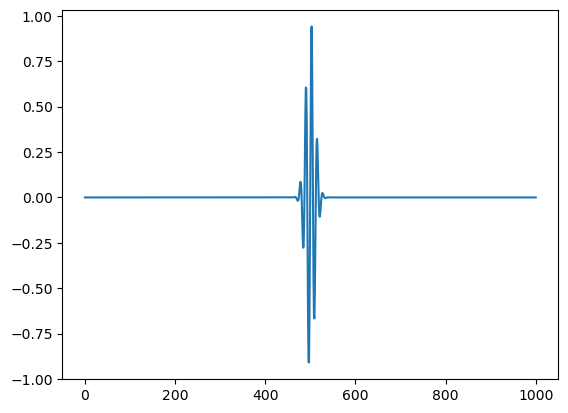

In [15]:
# initial wavefunction

def psi0(x):
    return exp(-((x-x_0)**2)/(2*sigma**2))*exp(1j*kappa*x)

x_vals = np.linspace(0,L,N+1)
psi0_vals = np.zeros((N+1),complex)

for i, j in enumerate(x_vals):
    psi0_vals[i] = psi0(j)
    
plt.plot(psi0_vals)

In [21]:
# formula for the elements of the tridiagonal matrices
a1 = 1 + h*1j*hbar/(2*m*a**2)
a2 = -h*1j*hbar/(4*m*a**2)
b1 = 1 - h*1j*hbar/(2*m*a**2)
b2 = h*1j*hbar/(4*m*a**2)

A = np.zeros((3,N+1),complex)
A[0,:] = a2
A[1,:] = a1
A[2,:] = a2

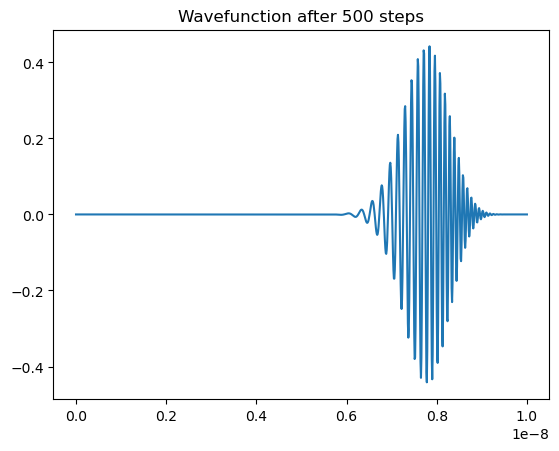

In [95]:
vi = np.zeros(N+1, complex)    # initialize vector v
vi[1:N] = b1*psi0_vals[1:N] + b2*(psi0_vals[2:N+1] + psi0_vals[0:N-1])    # v component formula

psi = banded(A,vi,1,1)    # apply banded function to get next psi (one Crank-Nicholson step)

for i in range(500):    # recurse 500 times to get psi after 500 Crank-Nicholson step
    vi[1:N] = b1*psi[1:N] + b2*(psi[2:N+1] + psi[0:N-1])
    psi = banded(A, vi, 1, 1)    # apply banded function, which gets used as initial psi on next iteration
    
plt.plot(x_vals, np.real(psi))
plt.title("Wavefunction after 500 steps")
plt.show()

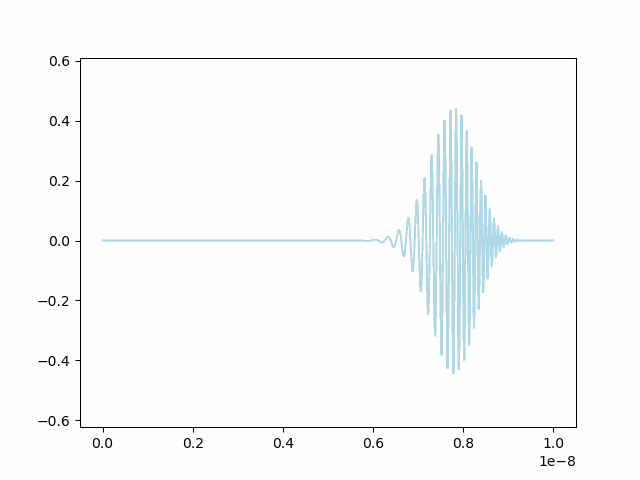

In [96]:
from matplotlib import animation
from IPython.display import Image

vi = np.zeros(N+1, complex)    # initialize vector v
vi[1:N] = b1*psi0_vals[1:N] + b2*(psi0_vals[2:N+1] + psi0_vals[0:N-1])    # v component formula starting with initial psi

psi = banded(A,vi,1,1)    # apply banded function to get next psi (one Crank-Nicholson step)

frames = []
fig = plt.figure()

for i in range(0,10000,1):
    vi = np.zeros(N+1, complex)
    vi[1:N] = b1*psi[1:N] + b2*(psi[2:N+1] + psi[0:N-1])
    psi = banded(A, vi, 1,1)

    if i%10 == 0:
        frames.append(plt.plot(x_vals, np.real(psi)))

ani = animation.ArtistAnimation(fig,frames, interval = 50, blit = True, repeat_delay = 1000)
writergif = animation.PillowWriter(fps = 30)
ani.save('Problem 1 animation tries.gif', writer=writergif)
plt.close()

Image(filename = "Problem 1 animation tries.gif")